2020 NJ AQI daily scores by County

In [3]:
# Dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
import numpy as np


In [4]:
# Import USA AQI by county data
usa_2020 = pd.read_csv('Resources/daily_aqi_by_county_2020.csv')
usa_2020.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [5]:
# Filter to just New Jersey
nj_2020 = usa_2020.loc[usa_2020['State Name'] == 'New Jersey',:]
nj_2020.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170457,New Jersey,Atlantic,34,1,2020-01-01,24,Good,Ozone,34-001-0006,2
170458,New Jersey,Atlantic,34,1,2020-01-02,32,Good,PM2.5,34-001-0006,1
170459,New Jersey,Atlantic,34,1,2020-01-03,24,Good,Ozone,34-001-0006,1
170460,New Jersey,Atlantic,34,1,2020-01-04,33,Good,PM2.5,34-001-0006,2
170461,New Jersey,Atlantic,34,1,2020-01-05,27,Good,Ozone,34-001-0006,1


In [8]:
#Look at info of data frame
nj_2020.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
Index: 5472 entries, 170457 to 175928
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 5472 non-null   object
 1   county Name                5472 non-null   object
 2   State Code                 5472 non-null   int64 
 3   County Code                5472 non-null   int64 
 4   Date                       5472 non-null   object
 5   AQI                        5472 non-null   int64 
 6   Category                   5472 non-null   object
 7   Defining Parameter         5472 non-null   object
 8   Defining Site              5472 non-null   object
 9   Number of Sites Reporting  5472 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 470.2+ KB


In [9]:
print(nj_2020['county Name'].unique())
print(nj_2020['county Name'].nunique())
# 16 Different counties are being tracked in NJ

['Atlantic' 'Bergen' 'Camden' 'Cumberland' 'Essex' 'Gloucester' 'Hudson'
 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth' 'Morris' 'Ocean' 'Passaic'
 'Union' 'Warren']
16


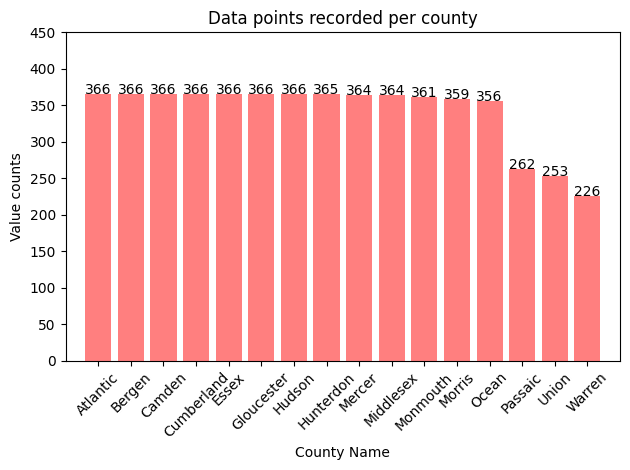

In [28]:
x_axis = [name for name in nj_2020['county Name'].unique()]
y_axis = [count for count in nj_2020['county Name'].value_counts()]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], y_axis[i], ha = 'center')
plt.xticks(rotation = 45)
plt.xlabel("County Name")
plt.ylabel('Value counts')
plt.title('Data points recorded per county')
plt.tight_layout()
plt.ylim(0, 450)
plt.xlim(-1, len(x_axis))
plt.show()

In [10]:
# Show the count for different parameters in data set. 
print(nj_2020['Defining Parameter'].value_counts())

Defining Parameter
Ozone    3321
PM2.5    1745
NO2       400
CO          6
Name: count, dtype: int64


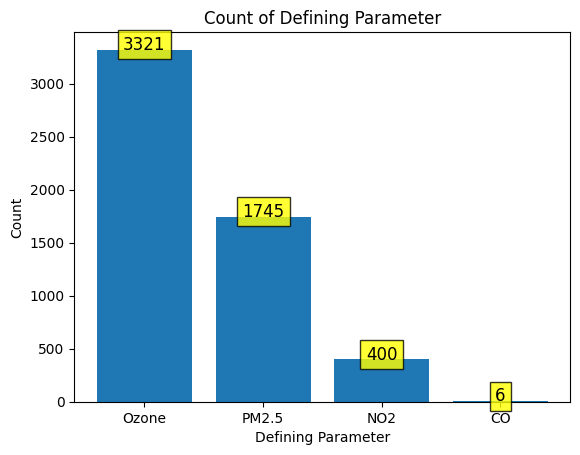

In [145]:
x_axis = nj_2020['Defining Parameter'].unique()
y_axis = nj_2020['Defining Parameter'].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel('Defining Parameter')
plt.ylabel('Count')
plt.title('Count of Defining Parameter')
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',
             fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.show()

In [11]:
# Find count by county name.
print(nj_2020['county Name'].value_counts())

county Name
Camden        366
Essex         366
Hudson        366
Mercer        366
Middlesex     366
Morris        366
Union         366
Cumberland    365
Bergen        364
Hunterdon     364
Warren        361
Atlantic      359
Ocean         356
Passaic       262
Gloucester    253
Monmouth      226
Name: count, dtype: int64


In [12]:
# Make the Date column a datetime object
nj_2020['Date'] = pd.to_datetime(nj_2020['Date'], format='%Y-%m-%d')
nj_2020.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [29]:
# Group by county name to find mean, max, and min for each county
nj_2020_grouped = nj_2020.groupby(['county Name'])

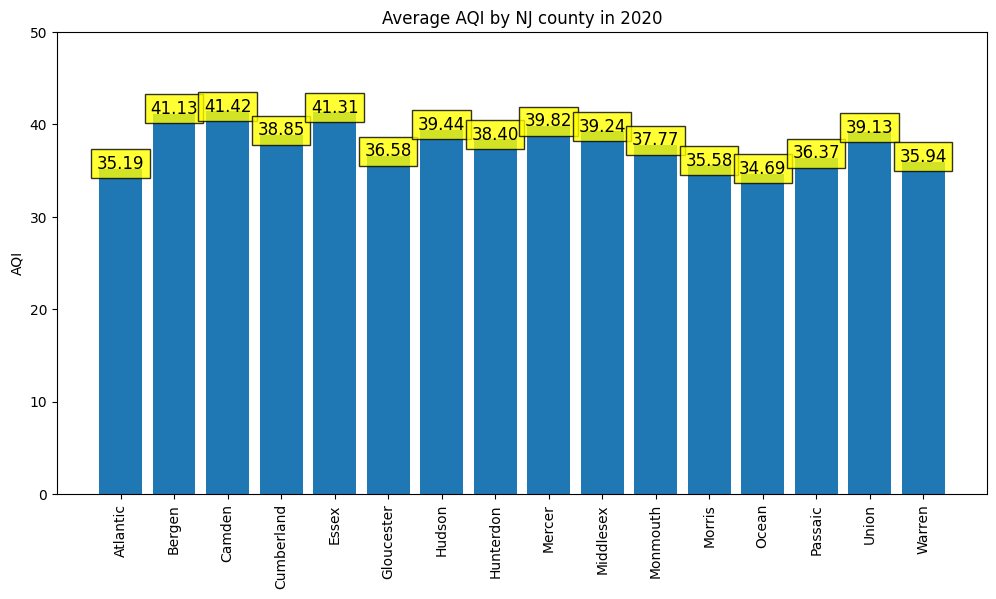

In [44]:
# Plotting mean AQI by county
means = nj_2020_grouped['AQI'].mean()
#print(means)
y_axis = [mean for mean in means]
x_axis = [i for i in means.index]
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 'vertical')
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]:.2f}', ha = 'center', fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 50)
plt.title("Average AQI by NJ county in 2020")
plt.show()

In [103]:
# Group the parameters and county and find the mean for each parameter by county
params_county = nj_2020.groupby(['county Name', 'Defining Parameter'])
means = pd.DataFrame(params_county['AQI'].mean())
means_by_param = means.reset_index()
means_by_param

,county Name,Defining Parameter,AQI
0,Atlantic,Ozone,33.930328
1,Atlantic,PM2.5,37.878261
2,Bergen,CO,1.333333
3,Bergen,NO2,31.772727
4,Bergen,Ozone,41.729560
5,Bergen,PM2.5,45.852941
6,Camden,NO2,29.300000
7,Camden,Ozone,38.504950
8,Camden,PM2.5,46.032468
9,Cumberland,NO2,20.250000


In [104]:
# Loop through data frame to find mean and county for each parameter
means_pm25 = []
names_pm25 = []
names_ozones = []
means_ozones = []
names_no2 = []
means_no2 = []

for index, row in means_by_param.iterrows():
    if row['Defining Parameter'] == 'PM2.5':
        means_pm25.append(row['AQI'])
        names_pm25.append(row['county Name'])
    elif row['Defining Parameter'] == 'NO2':
        means_no2.append(row['AQI'])
        names_no2.append(row['county Name'])
    elif row['Defining Parameter'] == 'Ozone':
        means_ozones.append(row['AQI'])
        names_ozones.append(row['county Name'])

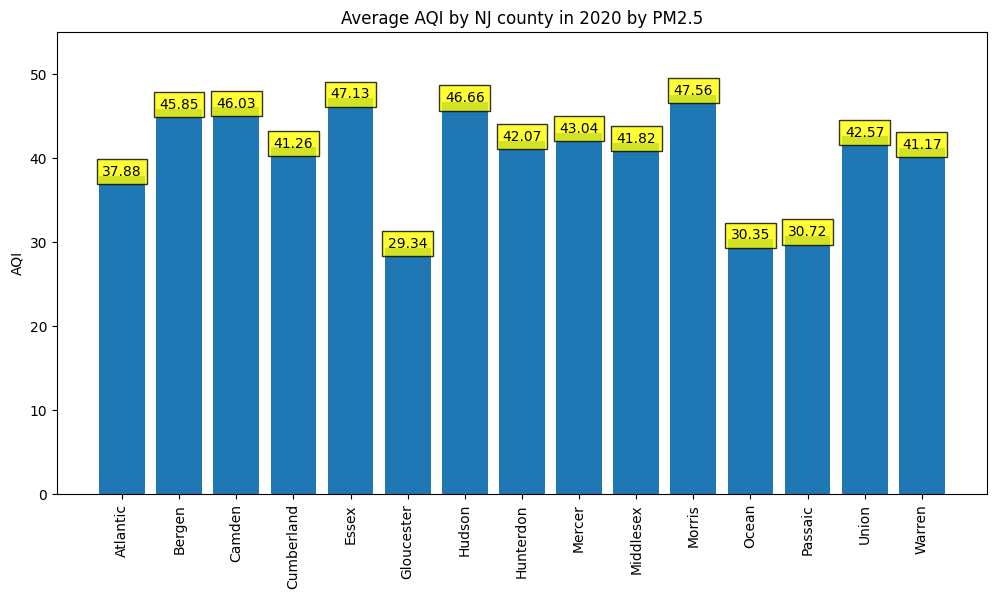

In [132]:
plt.figure(figsize=(12,6))
plt.bar(names_pm25, means_pm25)
plt.xticks(rotation = 'vertical')
for i in range(len(names_pm25)):
    plt.text(i, means_pm25[i], f'{means_pm25[i]:.2f}', ha = 'center', fontsize=10, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 55)
plt.title("Average AQI by NJ county in 2020 by PM2.5")
plt.show()

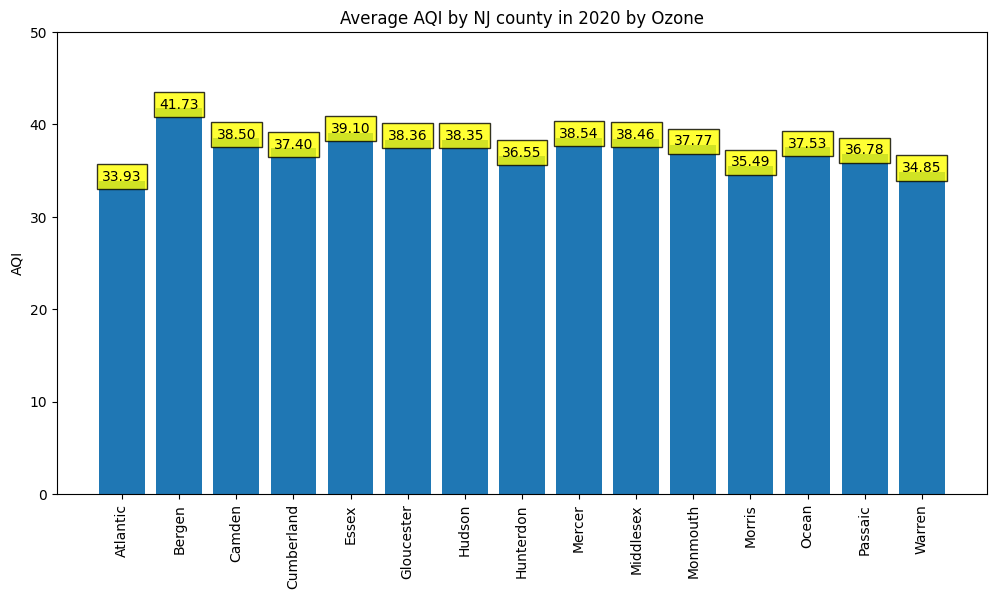

In [133]:
plt.figure(figsize=(12,6))
plt.bar(names_ozones, means_ozones)
plt.xticks(rotation = 'vertical')
for i in range(len(names_ozones)):
    plt.text(i, means_ozones[i], f'{means_ozones[i]:.2f}', ha = 'center', fontsize=10, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 50)
plt.title("Average AQI by NJ county in 2020 by Ozone")
plt.show()

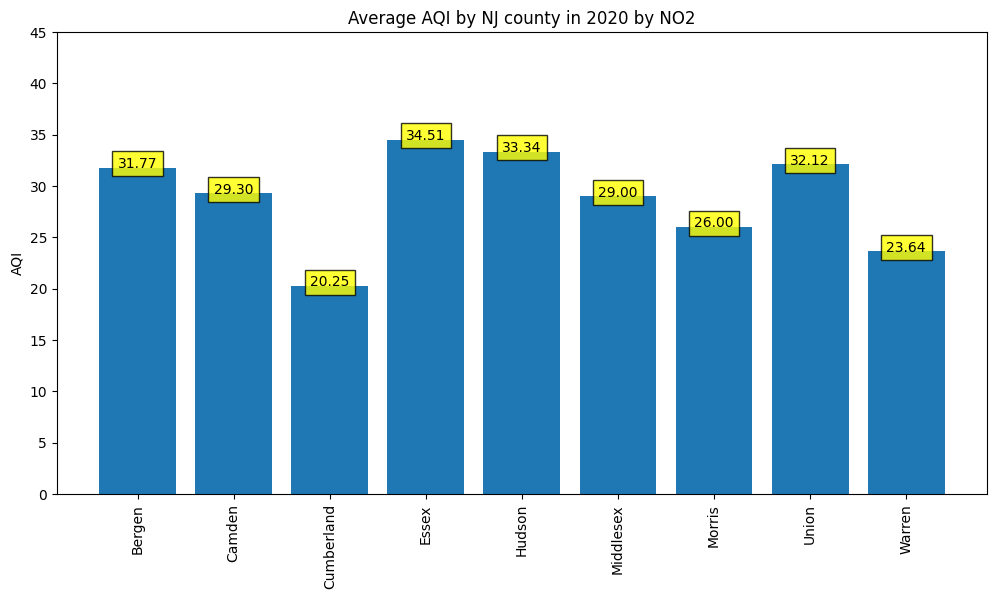

In [152]:
plt.figure(figsize=(12,6))
plt.bar(names_no2, means_no2)
plt.xticks(rotation = 'vertical')
for i in range(len(names_no2)):
    plt.text(i, means_no2[i], f'{means_no2[i]:.2f}', ha = 'center', fontsize=10, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 45)
plt.title("Average AQI by NJ county in 2020 by NO2")
plt.show()

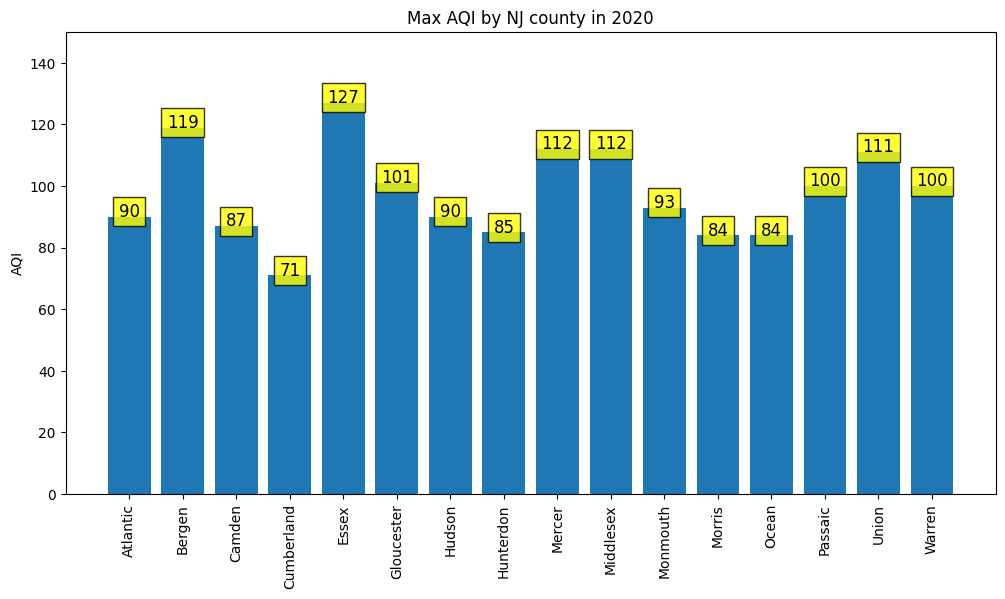

In [146]:
# Plotting max by county
maxes = nj_2020_grouped["AQI"].max()
y_axis = [max for max in maxes]
x_axis = [i for i in maxes.index]
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 'vertical')
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 150)
plt.title("Max AQI by NJ county in 2020")
plt.show()

In [139]:
# Create a dataframe with the max values for each county
max_date = []
county_max = []
max_value = []
def_parameter = []
names_maxes = [i for i in maxes.index]
for index, row in nj_2020.iterrows():
    for name in names_maxes:
        if row['county Name'] == name:
            if row['AQI'] == maxes[f'{name}']:
                max_date.append(row.name)
                county_max.append(row['county Name'])
                max_value.append(row['AQI'])
                def_parameter.append(row['Defining Parameter'])
new_maxes = {'Date':[date for date in max_date], 'County':[county for county in county_max], 'AQI': [value for value in max_value], 'Defining Parameter': [param for param in def_parameter]}
maxes_df = pd.DataFrame(new_maxes)
maxes_df

,Date,County,AQI,Defining Parameter
0,2020-06-04,Atlantic,90,Ozone
1,2020-08-10,Bergen,119,Ozone
2,2020-07-21,Camden,87,Ozone
3,2020-07-30,Camden,87,Ozone
4,2020-06-03,Cumberland,71,Ozone
5,2020-06-26,Cumberland,71,Ozone
6,2020-07-20,Cumberland,71,Ozone
7,2020-12-12,Essex,127,PM2.5
8,2020-07-21,Gloucester,101,Ozone
9,2020-07-22,Hudson,90,Ozone


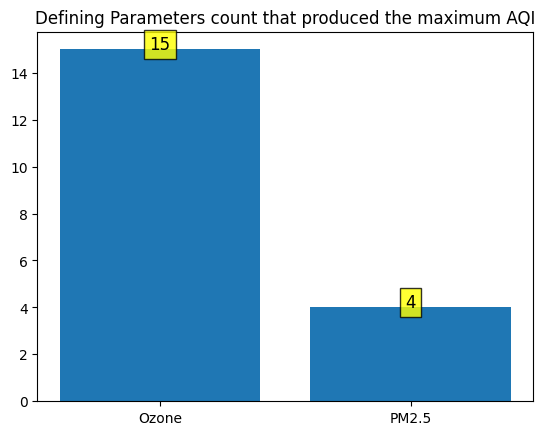

In [147]:
# Plot the count of defining parameters that produced the max aqi
x_axis = maxes_df['Defining Parameter'].unique()
y_axis = maxes_df['Defining Parameter'].value_counts()
plt.bar(x_axis, y_axis)
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
             fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.title('Defining Parameters count that produced the maximum AQI')
plt.show()

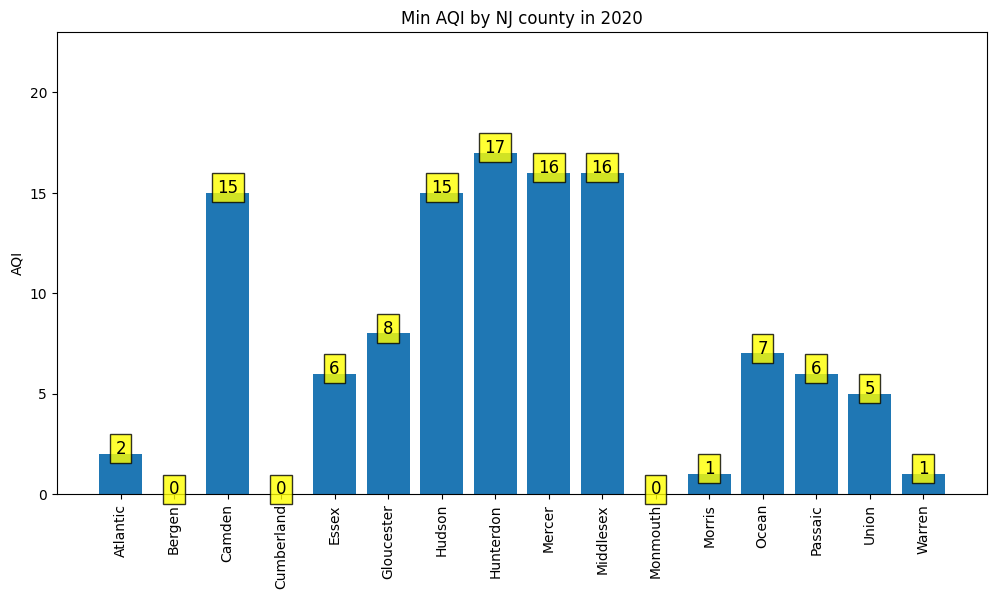

In [148]:
# Plotting min by county
mins = nj_2020_grouped["AQI"].min()
y_axis = [min for min in mins]
x_axis = [i for i in mins.index]
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 'vertical')
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.ylabel('AQI')
plt.ylim(0, 23)
plt.title("Min AQI by NJ county in 2020")
plt.show()

In [124]:
names_mins = [i for i in maxes.index]
min_date = []
county_min = []
min_value = []
def_param = []
for index, row in nj_2020.iterrows():
    for name in names_mins:
        if row['county Name'] == name:
            if row['AQI'] == mins[f'{name}']:
                min_date.append(row.name)
                county_min.append(row['county Name'])
                min_value.append(row['AQI'])
                def_param.append(row['Defining Parameter'])

In [125]:
new_mins = {'Date':[date for date in min_date], 'County':[county for county in county_min], 'AQI': [value for value in min_value], 'Defining Parameter': [param for param in def_param]}
mins_df = pd.DataFrame(new_mins)
mins_df

,Date,County,AQI,Defining Parameter
0,2020-05-27,Atlantic,2,PM2.5
1,2020-12-25,Bergen,0,CO
2,2020-07-10,Camden,15,Ozone
3,2020-09-10,Camden,15,Ozone
4,2020-09-09,Cumberland,0,Ozone
5,2020-12-07,Essex,6,CO
6,2020-10-26,Gloucester,8,Ozone
7,2020-10-13,Hudson,15,NO2
8,2020-07-10,Hunterdon,17,Ozone
9,2020-10-26,Mercer,16,Ozone


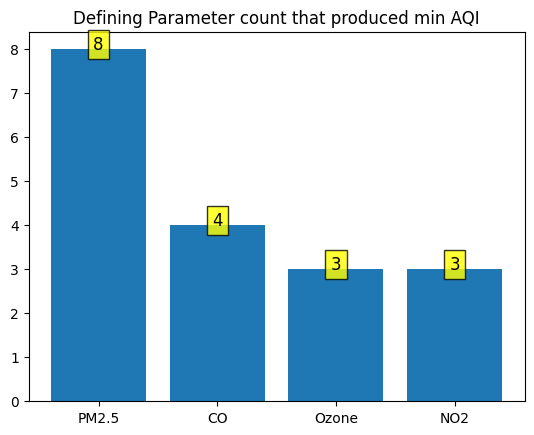

In [150]:
x_axis = mins_df['Defining Parameter'].unique()
y_axis = mins_df['Defining Parameter'].value_counts()
plt.bar(x_axis, y_axis)
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
             fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.title('Defining Parameter count that produced min AQI')
plt.show()

In [48]:
# Set Nj_2020 index to date
#nj_2020 = nj_2020.set_index('Date')
nj_2020.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2020-01-01,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,2
2020-01-02,New Jersey,Atlantic,34,1,32,Good,PM2.5,34-001-0006,1
2020-01-03,New Jersey,Atlantic,34,1,24,Good,Ozone,34-001-0006,1
2020-01-04,New Jersey,Atlantic,34,1,33,Good,PM2.5,34-001-0006,2
2020-01-05,New Jersey,Atlantic,34,1,27,Good,Ozone,34-001-0006,1


In [ ]:
# Decide Calplots:
# Bergen had a high max and a min of 0. Also, min consisted of CO (Rare parameter)
# Cumberland had a min AQI of 0 and lowest max.



In [153]:
# Create a dataframe for each county
atlantic = nj_2020[nj_2020['county Name'] == 'Atlantic']
bergen = nj_2020[nj_2020['county Name'] == 'Bergen']
essex = nj_2020[nj_2020['county Name'] == 'Essex']



findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


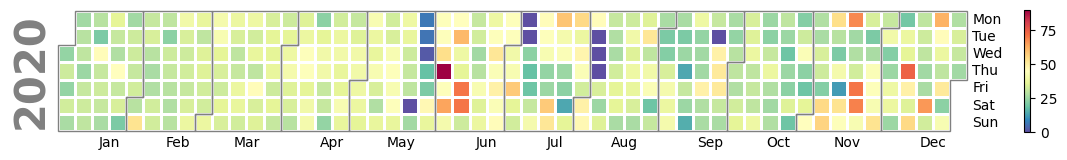

In [101]:
calplot.calplot(atlantic['AQI'], cmap='Spectral_r')

<Axes: title={'center': 'AQI'}, xlabel='county Name'>

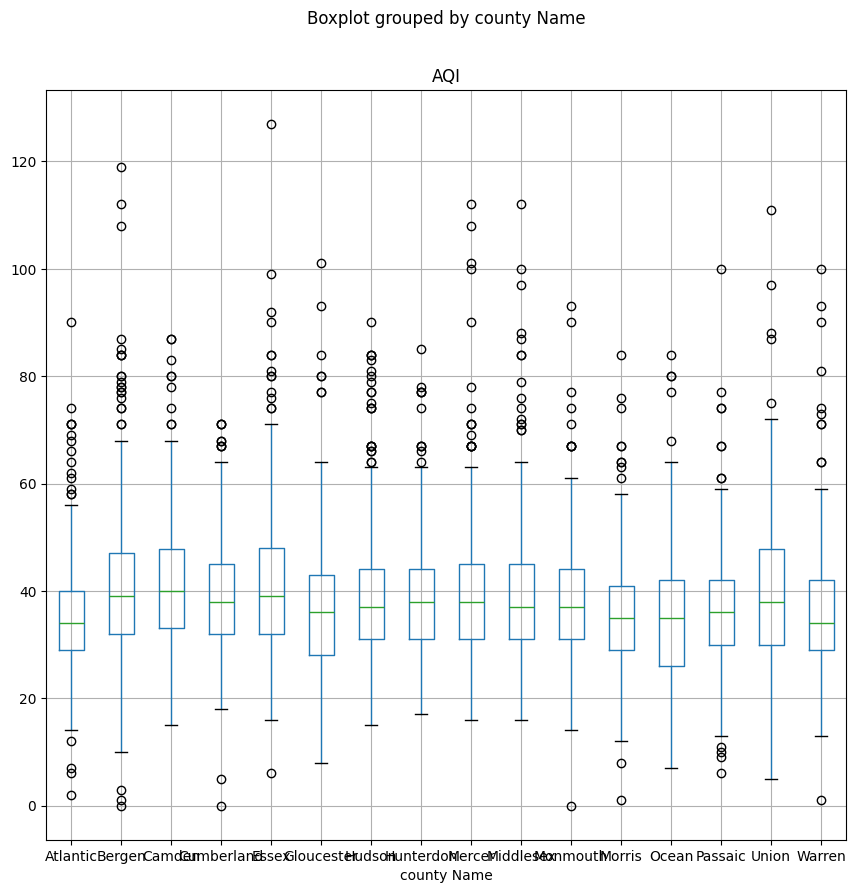

In [ ]:
##create a data frame with date as the index and the AQI values for the 2018 for the atlantic county 
#Groupby Atlantic county
#nj_2018_atlantic_df = nj_2018_df.loc[nj_2018_df['county Name'] == 'Atlantic']
#nj_2018_atlantic_df
#set date as the index
#nj_2018_atlantic_df.set_index('Date', inplace=True)
#print(nj_2018_atlantic_df)
#create a calplot for the atlantic city heat map 
#calplot.calplot(
#   nj_2018_atlantic_df['AQI'], 
#    cmap='RdYlGn_r', 
#    colorbar=True, 
#    suptitle='Air Quality Index (AQI) Heatmap - 2018 for Atlantic County', 
#    figsize=(16, 8)
#)
#plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


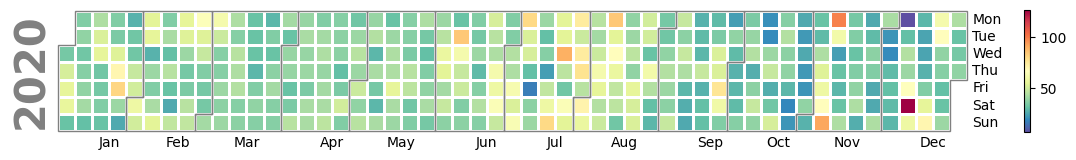

In [154]:
calplot.calplot(essex['AQI'], cmap='Spectral_r')